In [18]:
inFile=open('modelFitOut.log','r')

epochs=[i for i in range(0,90)]
lossesT=[0]*90
lossesV=[0]*90

for line in inFile.readlines():
    if 'Epoch' in line and '[660/663]' in line:
        thisEpoch=line.split(']')[0].split('[')[1]
        thisLoss=line.split('Loss')[1].split('(')[1].split(')')[0]
        lossesT[int(thisEpoch)]=float(thisLoss)
    
    elif 'Test' in line and '[160/166]' in line:
        # assume thisEpoch is still the correct one
        thisLoss=line.split('Loss')[1].split('(')[1].split(')')[0]
        lossesV[int(thisEpoch)]=float(thisLoss)

# we're missing element 36
epochs.pop(36)
lossesT.pop(36)
lossesV.pop(36)


0

In [23]:
if 0 in lossesT:
    print('cant find element ',lossesT.index(0),' in lossesT')
if 0 in lossesV:
    print('cant find element ',lossesV.index(0), 'in lossesV')

In [22]:
# just add the missing ones in by hand. 
# these are due to log dumping errors, not the fit itself
lossesV[5]=38.8722
lossesV[19]=23.3807

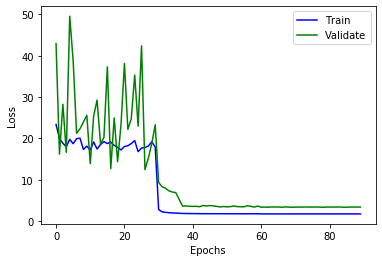

In [28]:
import matplotlib.pyplot as plt
plt.plot(epochs,lossesT,'b',label='Train')
plt.plot(epochs,lossesV,'g',label='Validate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('lossVsEpoch.pdf')

<Figure size 432x288 with 0 Axes>

In [1]:
import run_sceneryCNN_basicValidation

In [2]:
actual,predicted,confidences = run_sceneryCNN_basicValidation.run_sceneryCNN_basic()

In [3]:
import pandas as pd
performance = pd.DataFrame(list(zip(actual,predicted,confidences)),columns=['actual','predicted','confidences'])

In [4]:
performance.to_csv('sceneryCnnValidation.csv')

In [1]:
import pandas as pd
performance = pd.read_csv('sceneryCnnValidation.csv')

In [2]:
performance.head()

,Unnamed: 0,actual,predicted,confidences
0,0,9,4.107799,"[6.113832995424673e-08, 0.11039703339338303, 0..."
1,1,9,4.661887,"[8.156067633535713e-05, 0.10505783557891846, 0..."
2,2,9,4.816280,"[5.853348284290405e-06, 0.09315503388643265, 0..."
3,3,9,5.924742,"[3.284312697360292e-05, 0.05309387668967247, 0..."
4,4,9,4.832953,"[6.215407483978197e-05, 0.10841144621372223, 0..."


In [4]:
# get best choice from confidences, for an unweighted "predicted"
choices=[]
confidencesN=[]
import numpy as np

performance.head()
for iR,row in performance.iterrows():
    # list is ordered by score, so entry 0 is score 1
    newConf = list(map(float,row.confidences.replace('[',' ').replace(']',' ').split(',')))
    confidencesN.append(newConf)
    choices.append(newConf.index(max(newConf))+1)

In [5]:
print(performance.actual.max(),performance.actual.min())

9 1


In [6]:
print (max(choices),min(choices))

10 2


In [7]:
performance['choice']=choices
performance['confidencesN']=confidencesN

In [8]:
performance.head()

,Unnamed: 0,actual,predicted,confidences,choice,confidencesN
0,0,9,4.107799,"[6.113832995424673e-08, 0.11039703339338303, 0...",3,"[6.113832995424673e-08, 0.11039703339338303, 0..."
1,1,9,4.661887,"[8.156067633535713e-05, 0.10505783557891846, 0...",6,"[8.156067633535713e-05, 0.10505783557891846, 0..."
2,2,9,4.816280,"[5.853348284290405e-06, 0.09315503388643265, 0...",5,"[5.853348284290405e-06, 0.09315503388643265, 0..."
3,3,9,5.924742,"[3.284312697360292e-05, 0.05309387668967247, 0...",7,"[3.284312697360292e-05, 0.05309387668967247, 0..."
4,4,9,4.832953,"[6.215407483978197e-05, 0.10841144621372223, 0...",7,"[6.215407483978197e-05, 0.10841144621372223, 0..."


In [9]:
print(performance.iloc[0].confidences)

[6.113832995424673e-08, 0.11039703339338303, 0.2430819720029831, 0.24161331355571747, 0.2079772800207138, 0.1154659166932106, 0.04518027976155281, 0.014277365989983082, 0.0031269604805856943, 0.018879849463701248]


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(performance.actual,performance.choice)


# eventually, to get 2nd highest confidence class:
# remove highest from list (.pop) and redo the idxmax()

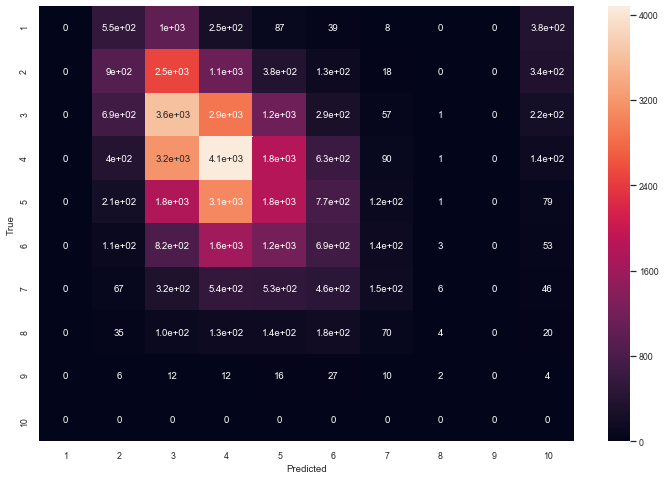

In [12]:
import matplotlib.pyplot as plt

import seaborn as sns
df_cm = pd.DataFrame(cm, index = range(1,11),
                  columns = range(1,11))
plt.figure(figsize = (12,8))
sns.set(font_scale=0.8)
sns.heatmap(df_cm, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show() # ta-da!
#plt.savefig('ConfusionMatrix_first.pdf')
plt.show()

In [14]:
import numpy as np
rawAccuracy = np.trace(cm)/np.sum(cm)
rawAccuracy

0.2655412584110495

In [44]:
print(df_cm)

    1    2     3     4     5    6    7  8  9   10
1   0  550  1007   246    87   39    8  0  0  382
2   0  896  2494  1117   382  133   18  0  0  336
3   0  690  3624  2907  1152  286   57  1  0  216
4   0  398  3173  4078  1809  629   90  1  0  137
5   0  211  1761  3074  1805  772  123  1  0   79
6   0  114   820  1636  1226  690  142  3  0   53
7   0   67   322   544   533  455  150  6  0   46
8   0   35   105   130   142  184   70  4  0   20
9   0    6    12    12    16   27   10  2  0    4
10  0    0     0     0     0    0    0  0  0    0


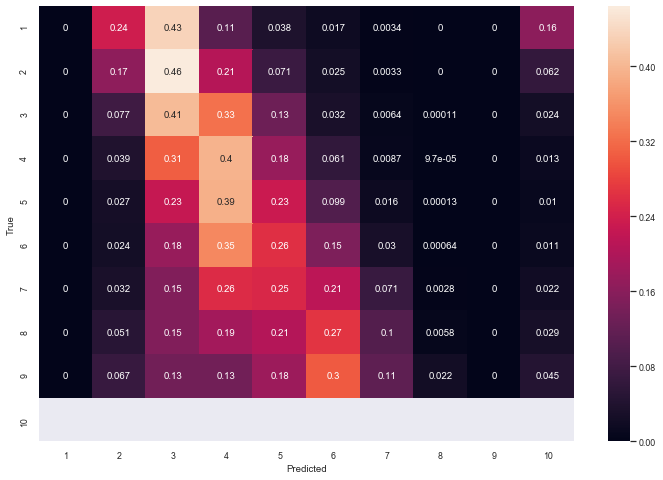

In [31]:

df_cmN = df_cm.div(df_cm.sum(axis=1), axis=0)

plt.figure(figsize = (12,8))
sns.set(font_scale=0.8)
sns.heatmap(df_cmN, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('ConfusionMatrixNorm_first.pdf')
plt.show()

In [32]:
df_cmN.drop(10,inplace=True)
df_cmN
normalizedCM = df_cmN.to_numpy()

normAccuracy = np.trace(normalizedCM)/np.sum(normalizedCM)
normAccuracy

0.15801147855768397

In [46]:
# get best choice from confidences, for an unweighted "predicted"
choices2=[]

for iR,row in performance.iterrows():
    # list is ordered by score, so entry 0 is score 1
    if not len(row.confidencesN)==10:
        print('you didnt fix it right!')
    confDup = row.confidencesN
    confDup.pop(row.choice-1)
    choices2.append(confDup.index(max(confDup))+1)

In [47]:
performance['choice2']=choices2

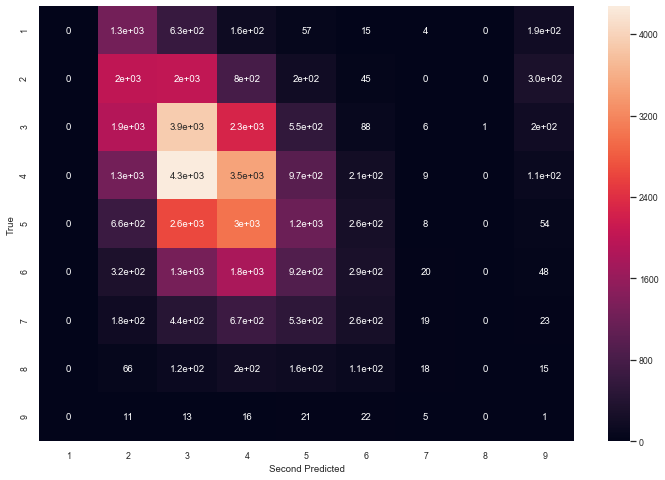

<Figure size 432x288 with 0 Axes>

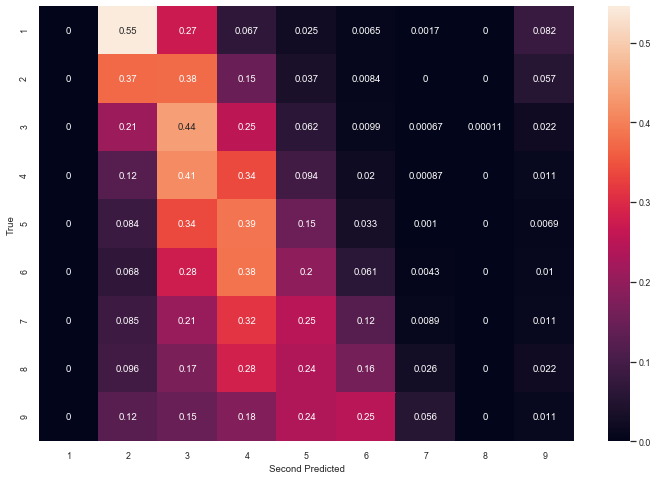

In [50]:
cm2 = confusion_matrix(performance.actual,performance.choice2)
df_cm2 = pd.DataFrame(cm2, index = range(1,10),
                  columns = range(1,10))
plt.figure(figsize = (12,8))
sns.set(font_scale=0.8)
sns.heatmap(df_cm2, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.ylabel('True')
plt.xlabel('Second Predicted')
plt.show() # ta-da!
plt.savefig('ConfusionMatrix_second.pdf')
plt.show()



df_cm2N = df_cm2.div(df_cm2.sum(axis=1), axis=0)

plt.figure(figsize = (12,8))
sns.set(font_scale=0.8)
sns.heatmap(df_cm2N, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.ylabel('True')
plt.xlabel('Second Predicted')
plt.savefig('ConfusionMatrixNorm_second.pdf')
plt.show()

In [2]:
import seaborn as sns
ax = sns.regplot(x="actual", y="predicted", data=performance)

In [3]:
performance['actString']=performance['actual'].to_string()


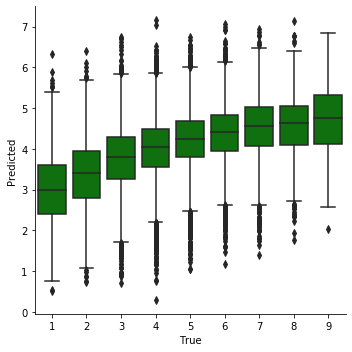

In [4]:
plot=ax2=sns.catplot(x='actual',y='predicted',kind='box',data=performance,color='green')
plot.set_axis_labels("True","Predicted")

In [6]:
from sklearn import metrics
import numpy as np
print (np.sqrt(metrics.mean_squared_error(performance.actual,performance.predicted)))

1.4502932736694112


In [22]:
plot.savefig('PredictedVsTrue.pdf')

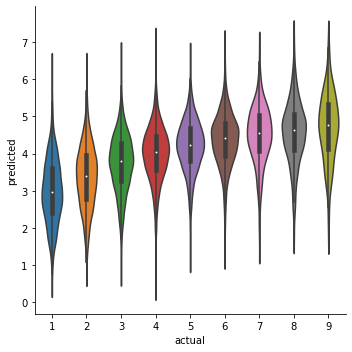

In [11]:
ax3=sns.catplot(x='actual',y='predicted',kind='violin',data=performance)

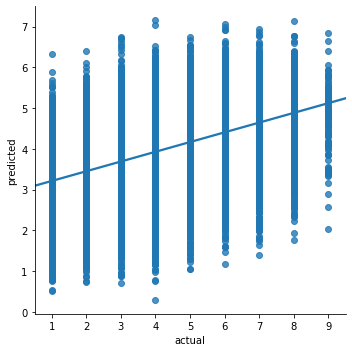

In [12]:
ax4=sns.lmplot(x="actual", y="predicted", data=performance)

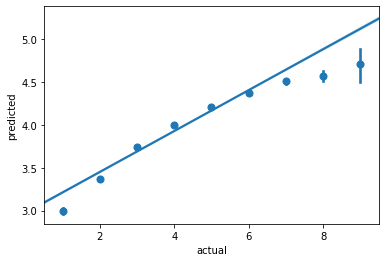

In [15]:
import numpy as np
ax5 = sns.regplot(x="actual", y="predicted", data=performance,x_estimator=np.mean)

In [ ]:

# now i've rewritten the function to also return the confidences for each class, for each image
actual,predicted,confidences = run_sceneryCNN_basicValidation.run_sceneryCNN_basic()
